# Homework 6

This homework is all about useful external libraries that are most common to use in astronomy research. The two most important libraries apart from scipy, numpy, and matplotlib are **astropy** and **pandas**. We explore the basics of these super versatile libraries. 

# Astropy (40 Points)

## CRAZY UNIT CONVERSION!!! (20 Points)

As you take more astronomy classes, you will face more and more unit conversion problems - they are annoying. That's why astropy.units is very helpful. Let's do some practices here.

The documentations for astropy.units and astropy.constants will very helpful to you.

astropy.units documentation: https://docs.astropy.org/en/stable/units/

astropy.constants documentation: https://docs.astropy.org/en/stable/constants/

NOTE: In this problem, you MUST use astropy.constants when doing calculations involving fundamental constants. Also, you cannot look up values such as solar mass, earth mass, etc. Use the two packages solely.

### Problem 1.1) Speed of light (5 Points)

What is the speed of light ($c$) in $pc/yr$?

In [2]:
### Write your code here
import astropy.constants as cons 
import astropy.units as u 

cons.c.to(u.pc / u.yr)

<Quantity 0.30660139 pc / yr>

### Problem 1.2) Newton's 2nd Law (5 Points)

Recall that NII states 
$$F =ma\,\,.$$
Say a force of $97650134N$ is exerted on an object having a mass of $0.0071$ earth mass. What is the acceleration of the object in $AU/days^2$?

In [3]:
### Write your code here

a = (97650134 * u.N) / (0.0071*u.M_earth) #a = F/m
a.to(u.AU / (u.d)**2)

<Quantity 1.14917074e-16 AU / d2>

### Problem 1.3) Newton's Universal Law of Gravitation (10 Points)

Recall that the gravitational acceleration due to an object with mass $m$ at a distance $r$ is given by 
$$a_g = \frac{Gm}{r^2}\,\,.$$
What is the gravitational acceleration due to a planet of $3.1415926$ Jupiter-mass at a distance of $1.523AU$? Give your answer in $pc/yr^2$.

In [3]:
### Write your code here

a = cons.G*(3.1415926*cons.M_jup)/(1.523*u.AU)**2 
a.to(u.pc / (u.yr)**2)

<Quantity 2.47449776e-07 pc / yr2>

## Problem 1.4:
### Visualising Coordinate Transformation (20 Points)

We introduced coordinate transformation using astropy, but maybe that was too astract to you, so let's use this problem as a way for you to visualise this process. Each part will be worth **5 Points**

There are several things you need to do:
1. Open up the FITS file named 'clusters.fits' (this part of the code is written for you already)


2. Read it as a table using astropy.table (you will have to import the packages you need and write your own code from hereafter)


3. Plot the positions of all the objects in the table, COLOUR-CODED by their types (there is a column named 'CLASS'), with RA on the x-axis and DEC on the y-axis. You should see a curved trend with a huge dip in the middle.


4. Carry out a coordinate transformation from the ICRS coordinates to the galactic coordinates - there is a column named "DISTANCE" which you will need. 


5. Now plot the position of all the objects in the galactic coordinates, with $\ell$ on the x-axis and $b$ on the y-axis; again, colour-code everything by their "CLASS". If you did everything correctly, you should see that the curve in the previous plot resembles a horizontal band. 


6. Answer this question: What is that curved band in the first plot and the horizontal band in the second plot? Does it make sense that the band got straightened up? Why?


Note: When you make your plots, please include the axis labels with units and the legend.

In [4]:
from astropy.io import fits
#You will have to import other packages to complete this problem 

###IMPORT YOUR OTHER PACKAGES HERE 

from astropy.table import Table
from astropy.coordinates import SkyCoord 
import matplotlib.pyplot as plt
import numpy as np


In [8]:
fits_file = fits.open('clusters.fits')
data = Table.read(fits_file)
ra = np.array([data['RA']])
ra


array([[357.975, 193.429, 266.835, ...,  11.85 ,  94.575,  64.47 ]])

['                                             NEBULA\n'
 '                                       UNIDENTIFIED\n'
 '                                  OPEN STAR CLUSTER\n'
 '                          OB ASSOCIATION/HII REGION\n'
 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC\n']


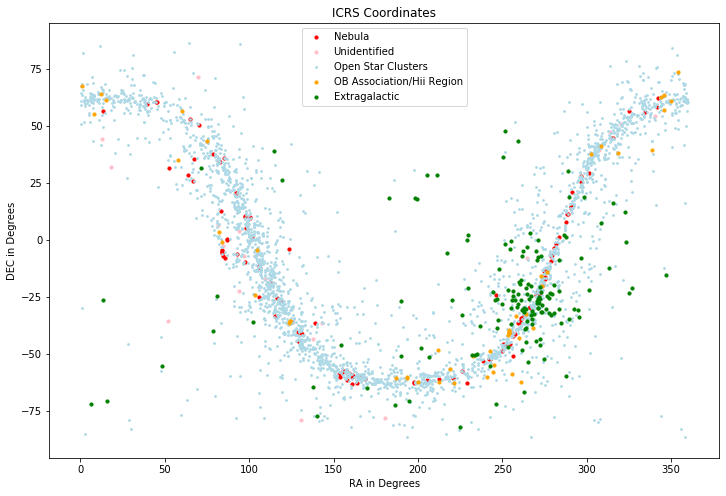

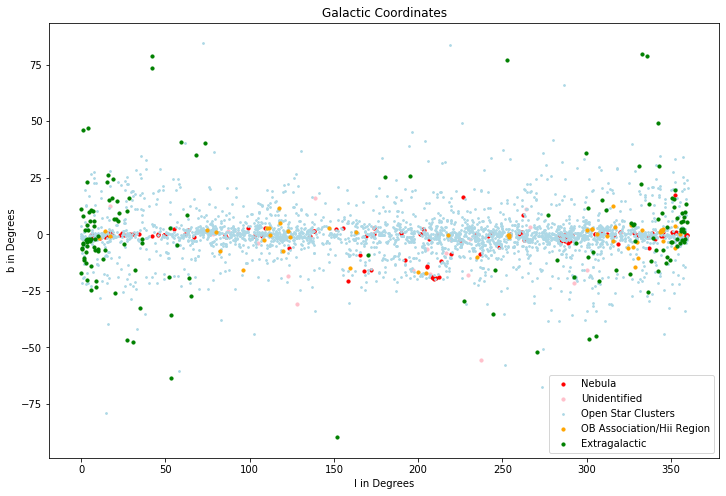

In [21]:
fits_file = fits.open('clusters.fits')

#To read the fits file as a table, simply run the line: Table.read(fits_file)
#Although you will have to write up your code to get that Table function 

### YOUR CODE HERE

data = Table.read(fits_file)
CLASS = np.array(data['CLASS'])

ra_data = np.array(data['RA'])
dec_data = np.array(data['DEC'])


print(np.unique(CLASS))

RA1,DEC1 = [], []
RA2,DEC2 = [], []
RA3,DEC3 = [], []
RA4,DEC4 = [], []
RA5,DEC5 = [], []

for i in range(len(ra_data)): 
    if CLASS[i] == '                                             NEBULA\n':
        RA1.append(ra_data[i])
        DEC1.append(dec_data[i]) 
    elif CLASS[i] == '                                       UNIDENTIFIED\n':
        RA2.append(ra_data[i])
        DEC2.append(dec_data[i]) 
    elif CLASS[i] == '                                  OPEN STAR CLUSTER\n':
        RA3.append(ra_data[i])
        DEC3.append(dec_data[i]) 
    elif CLASS[i] == '                          OB ASSOCIATION/HII REGION\n':
        RA4.append(ra_data[i])
        DEC4.append(dec_data[i]) 
    else:
        RA5.append(ra_data[i])
        DEC5.append(dec_data[i])
        
        
        
plt.figure(figsize=(12,8))
plt.scatter(RA1,DEC1,s = 10, c = 'red', label = 'Nebula')
plt.scatter(RA2,DEC2,s = 10, c = 'pink', label = 'Unidentified')
plt.scatter(RA3,DEC3,s = 3, c = 'lightblue', label = 'Open Star Clusters')
plt.scatter(RA4,DEC4,s = 10, c = 'orange', label = 'OB Association/Hii Region')
plt.scatter(RA5,DEC5,s = 10, c = 'green', label = 'Extragalactic')

plt.xlabel('RA in Degrees')
plt.ylabel('DEC in Degrees')
plt.legend()
plt.title('ICRS Coordinates')
plt.show()

#################################################################
#################################################################

dist = np.array(data['DISTANCE'])
icrs = SkyCoord(ra=ra_data*u.deg, dec=dec_data*u.deg)
GAL = icrs.transform_to('galactic')
L_data = np.array(GAL.l)
B_data = np.array(GAL.b)


L1,B1 = [], []
L2,B2 = [], []
L3,B3 = [], []
L4,B4 = [], []
L5,B5 = [], []


for i in range(len(ra_data)): 
    if CLASS[i] == '                                             NEBULA\n':
        L1.append(L_data[i])
        B1.append(B_data[i]) 
    elif CLASS[i] == '                                       UNIDENTIFIED\n':
        L2.append(L_data[i])
        B2.append(B_data[i]) 
    elif CLASS[i] == '                                  OPEN STAR CLUSTER\n':
        L3.append(L_data[i])
        B3.append(B_data[i]) 
    elif CLASS[i] == '                          OB ASSOCIATION/HII REGION\n':
        L4.append(L_data[i])
        B4.append(B_data[i]) 
    else:
        L5.append(L_data[i])
        B5.append(B_data[i])


plt.figure(figsize=(12,8))
plt.scatter(L1,B1 , s = 10, c = 'red', label = 'Nebula')
plt.scatter(L2,B2 , s = 10, c = 'pink', label = 'Unidentified')
plt.scatter(L3,B3 , s = 3, c = 'lightblue', label = 'Open Star Clusters')
plt.scatter(L4,B4 , s = 10, c = 'orange', label = 'OB Association/Hii Region')
plt.scatter(L5,B5 , s = 10, c = 'green', label = 'Extragalactic')
plt.xlabel('l in Degrees')
plt.ylabel('b in Degrees')
plt.title('Galactic Coordinates')
plt.legend()
plt.show()


(DOUBLE CLICK HERE TO ANSWER QUESTION 6):

YOUR ANSWER: 

# Pandas (30 Points)

One of the most efficient and easy to use libraries for importing data files. We will explore the basics here.

Let's import some data that represents the position of a ball being thrown off the roof of Campbell Hall. Using some basic kinematics we can derive the following equation.

$$y(t) = -\frac{1}{2} g t^2 + v_{0,y} t + y_0$$

For this problem we need to import our position measurements from our fellow colleagues in our research group.

<img src='diagram.jpeg' width="600" height="400"> 

## Problem 2.1 (5 Points)

Your job for this problem is to simply read in the file named **"projectile.csv"** using the pandas library (DONT USE `numpy`). Print out your DataFrame so we can see what the data looks like as a table.

In [4]:
###YOUR CODE HERE###
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
import pandas as pd

data = pd.read_csv('projectile.csv')

data

,Unnamed: 0,Time[s],Position[m]
0,0,0.000000,95.000000
1,1,0.097959,96.128490
2,2,0.195918,102.162939
3,3,0.293878,103.103347
4,4,0.391837,102.949714
5,5,0.489796,102.702041
6,6,0.587755,109.360326
7,7,0.685714,101.924571
8,8,0.783673,106.394775
9,9,0.881633,108.770939


## Problem 2.2 (5 Points)

Now load your DataFrame columns into numpy arrays and make a plot of Position vs. Time.

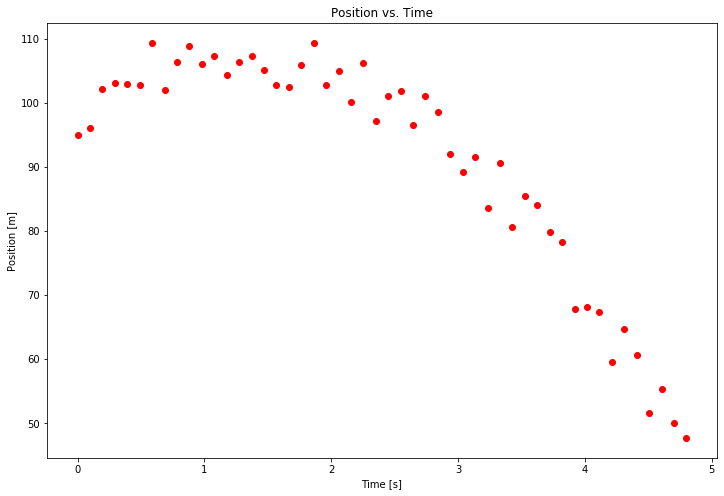

In [6]:
###YOUR CODE HERE###

time = data['Time[s]']
position = data['Position[m]']


plt.figure(figsize=(12,8))
plt.plot(time, position, 'ro')
plt.title('Position vs. Time')
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.show()

## Problem 2.3 (5 Points)

In the last problem set we learned how to curve fit a quadratic equation. The above equation is also a quadratic equation with respect to time. Use what we learned last week to fit a curve to the noisy data from our fellow researchers. Explicitly print out what the initial velocity $v_{0,y}$ and initial height $y_0$ are based on your curve fit along with their respective errors. 

a=-5.013+/-0.235
b=13.298+/-1.167
c=97.839+/-1.211

 Initial velocity in the y direction is going to be 13.298 m/s and the initial
height was 97.839 m


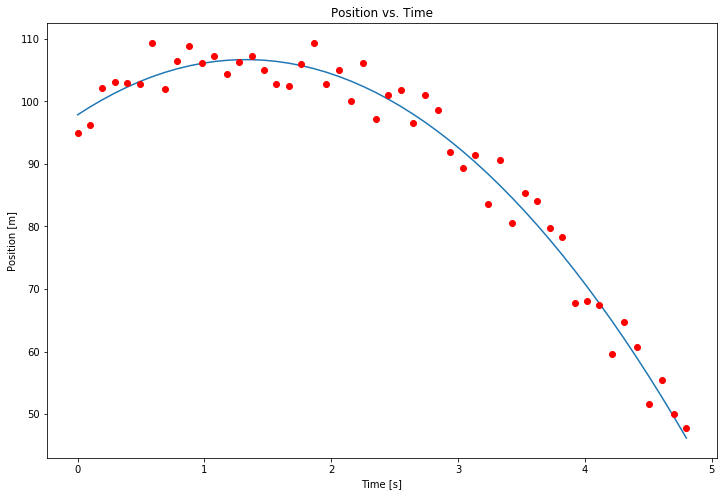

In [13]:
###YOUR CODE HERE###

"""This solution is from physics 77"""
#we have to define our model with our needed parameters
def model_quad(x, a, b, c):
    return a*x**2 + b*x + c

par0    = np.array([-2.5, 1.5, 100.0]) # initial guess for parameters
par, cov = fitter.curve_fit(model_quad, time, position, par0) #fitter.curve_fit takes in the model, x,y data, guess, and sigma

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f}'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))
c = par[2]
ec = np.sqrt(cov[2,2])
print('c={0:6.3f}+/-{1:5.3f}'.format(c,ec))


print("""\n Initial velocity in the y direction is going to be 13.298 m/s and the initial
height was 97.839 m""")

plt.figure(figsize=(12,8))
plt.plot(time, model_quad(time, a,b,c))
plt.plot(time, position, 'ro')
plt.title('Position vs. Time')
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.show()

## Problem 2.4 (5 Points)

Alright now we have a model function that can fit the function as a function of time. create two lists/arrays of values using this function. One list's values should be time where we use `t = np.linspace(0,5,100)` to create the values and the other list should be your model's output after taking in all those times. (A list of the values you would normally plot)

Once you have created your two lists of values, construct a pandas DataFrame using these lists. Your data frame should have two columns with 100 values each. 

In [20]:
###Your Code Here###

t = np.linspace(0,5,100)
new_position = model_quad(t, a,b,c)

DataFrame = pd.DataFrame({'time': t, 'position': new_position})

DataFrame

,time,position
0,0.000000,97.839095
1,0.050505,98.497948
2,0.101010,99.131228
3,0.151515,99.738934
4,0.202020,100.321068
...,...,...
95,4.797980,46.246369
96,4.848485,44.475780
97,4.898990,42.679619
98,4.949495,40.857884


## Problem 9 (10 Points)

Last part of the problem set! This is basically one line of code. Export your new DataFrame to a csv file called **"trajectory.csv"**, this will be useful for your colleagues!

In [21]:
###Your Code Here###

DataFrame.to_csv('trajectory.csv')